In [1]:
import pandas as pd
import numpy as np
import time

from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score

import matplotlib.pyplot as plt



In [2]:
dfAdult = pd.read_csv(".\\data\\adult.csv")

# reshuffle input data ..good thing for neural netwrok
#dfAdult = dfAdult.sample(frac=1).reset_index(drop=True) 
dfAdultWithoutSalary = dfAdult.drop(columns=['salary'])
dfAdultHotEncoded = pd.get_dummies(dfAdult,columns=['salary','education','workclass','occupation','relationship','marital-status','race','sex'])
dfAdultHotEncoded = dfAdultHotEncoded.drop(columns=['salary_ <=50K','native-country'])
X_HotEncoded = dfAdultHotEncoded.drop('salary_ >50K',axis=1)
Y_HotEncoded = dfAdultHotEncoded['salary_ >50K']

label_encoding = preprocessing.LabelEncoder()
dfAdult['salary'] = label_encoding.fit_transform(dfAdult['salary'])
dfAdult['education'] = label_encoding.fit_transform(dfAdult['education'])
dfAdult['workclass'] = label_encoding.fit_transform(dfAdult['workclass'])
dfAdult['occupation'] = label_encoding.fit_transform(dfAdult['occupation'])
dfAdult['relationship'] = label_encoding.fit_transform(dfAdult['relationship'])
dfAdult['marital-status'] = label_encoding.fit_transform(dfAdult['marital-status'])
dfAdult['race'] = label_encoding.fit_transform(dfAdult['race'])
dfAdult['sex'] = label_encoding.fit_transform(dfAdult['sex'])
dfAdult['native-country']=label_encoding.fit_transform(dfAdult['native-country'])

X = dfAdult.drop('salary',axis=1)
Y = dfAdult['salary']
print(X.columns)
print(X.shape)

print(Y.shape)

print(X_HotEncoded.columns)
#X=X_HotEncoded
#Y=Y_HotEncoded
#X = X[:, None]


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
(32561, 14)
(32561,)
Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'education_ 10th', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', '

In [3]:
dfMadelon_X = pd.read_csv(".\\data\\madelon_train.csv")
dfMadelon_Y1 = pd.read_csv(".\\data\\madelon_train_labels.csv")

dfMadelon_Y = dfMadelon_Y1['Predict']

dfMadelon = dfMadelon_X.copy()
dfMadelon["Predict"] = dfMadelon_Y
print(dfMadelon_X.shape)
print(dfMadelon_Y.shape)
print(dfMadelon.columns)



(2000, 500)
(2000,)
Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10',
       ...
       'Col492', 'Col493', 'Col494', 'Col495', 'Col496', 'Col497', 'Col498',
       'Col499', 'Col500', 'Predict'],
      dtype='object', length=501)


In [4]:
def CalculateBICScore(X,actual_label):
    lowest_bic = np.infty
    bic = []
    aic = []
    score_ = []
    silhouette_avg = []
    loglowerbound =[]
    iterations =[]
    converged =[]
    homogeneity =[]
    completeness = []
    n_components_range = range(2, 10)
    cv_types = ['full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type,random_state=10,max_iter=1000)
            gmm.fit(X)
            bic_score = gmm.bic(X)
            score = gmm.score(X)
            aic_score = gmm.aic(X)
            cluster_labels = gmm.predict(X)
            silscore = silhouette_score(X, cluster_labels)
            homogeneity_avg = homogeneity_score(actual_label, cluster_labels)
            homogeneity.append(homogeneity_avg)
            completeness_avg = completeness_score(actual_label, cluster_labels)
            completeness.append(completeness_avg)
            print("Component_",n_components," BIC Score is = ",bic_score, " and logscore = ",score," AIC score= ",aic_score," Silhoueete =",silscore)
            loglowerbound.append(gmm.lower_bound_)
            iterations.append(gmm.n_iter_)
            converged.append(gmm.converged_)
            bic.append(bic_score)
            score_.append(score)
            aic.append(aic_score)
            silhouette_avg.append(silscore)
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    
    plt.figure(figsize=(7,4))
    plt.title("The GMM BIC and AIC score\nfor determining number of clusters\n",fontsize=16)
    plt.scatter(x=[i for i in range(2,10)],y=bic,s=150,edgecolor='k',label='BIC')
    plt.scatter(x=[i for i in range(2,10)],y=aic,s=150,edgecolor='r',label='AIC')
    plt.grid(True)
    plt.xlabel("Number of clusters",fontsize=14)
    plt.ylabel("Gaussian mixture BIC and AIC score",fontsize=15)
    plt.xticks([i for i in range(2,10)],fontsize=14)
    plt.yticks(fontsize=15)
    plt.legend(scatterpoints=1)
    plt.show()
    
    plt.plot(range(2, 10), homogeneity, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Homogenity Score')
    plt.show()
    
    plt.plot(range(2, 10), completeness, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Completeness Score')
    plt.show()
    
    plt.title("The GMM log-likelihoodscore\nfor determining number of clusters\n",fontsize=16)
    plt.scatter(x=[i for i in range(2,10)],y=score_,s=150,edgecolor='k')
    plt.xlabel("Number of clusters",fontsize=14)
    plt.ylabel("Log-Likelihood score",fontsize=15)    
    plt.show()
    
    plt.title("The GMM silhouette score \nfor determining number of clusters\n",fontsize=16)
    plt.scatter(x=[i for i in range(2,10)],y=silhouette_avg,s=150,edgecolor='k')
    plt.xlabel("Number of clusters",fontsize=14)
    plt.ylabel("silhouette_avg score",fontsize=15)    
    plt.show()
    
    plt.title("The GMM converged log score \nfor determining number of clusters\n",fontsize=16)
    plt.scatter(x=[i for i in range(2,10)],y=loglowerbound,s=150,edgecolor='k',label='loglowerbound')
    #plt.scatter(x=[i for i in range(2,10)],y=iterations,s=150,edgecolor='g',label='iterations')
    plt.xlabel("Number of clusters",fontsize=14)
    plt.ylabel("loglowerbound score",fontsize=15)
    plt.legend(scatterpoints=1)
    plt.show()
    
    
    
    i =0
    for n_components in n_components_range:
        print("Component_",n_components," Converged is = ",converged[i])
        i =i+1
    return best_gmm

Component_ 2  BIC Score is =  -5332008.414715027  and logscore =  82.60401753614887  AIC score=  -5370228.829989087  Silhoueete = 0.0317388560578939
Component_ 3  BIC Score is =  -6513996.898848089  and logscore =  101.11786673005199  AIC score=  -6571331.717194445  Silhoueete = -0.007639454252866622
Component_ 4  BIC Score is =  -7635768.288318186  and logscore =  118.70703463862962  AIC score=  -7712217.509736838  Silhoueete = -0.022451180464539897
Component_ 5  BIC Score is =  -8359736.589237225  and logscore =  130.187620369893  AIC score=  -8455300.213728173  Silhoueete = -0.05046549985068405
Component_ 6  BIC Score is =  -8792679.215446696  and logscore =  137.1992758669872  AIC score=  -8907357.24300994  Silhoueete = -0.046321276199797236
Component_ 7  BIC Score is =  -9517066.082444558  and logscore =  148.68628901262397  AIC score=  -9650858.513080098  Silhoueete = -0.06140882446645256
Component_ 8  BIC Score is =  -9913749.40134343  and logscore =  155.14115406546583  AIC sco

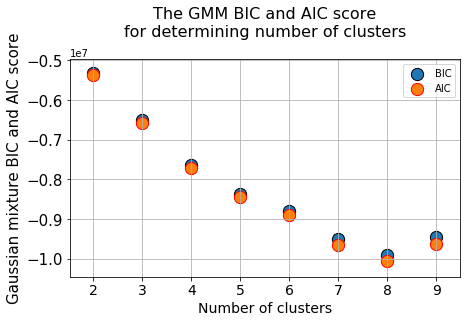

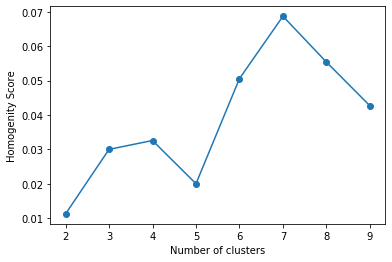

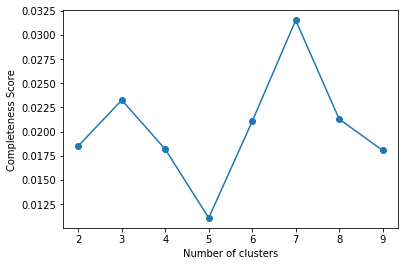

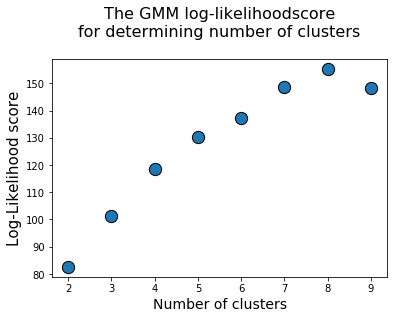

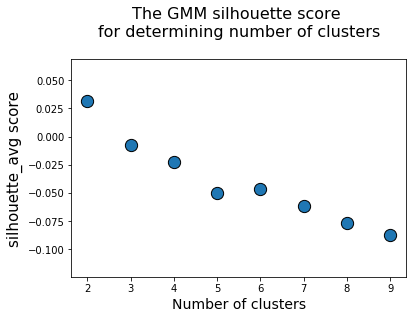

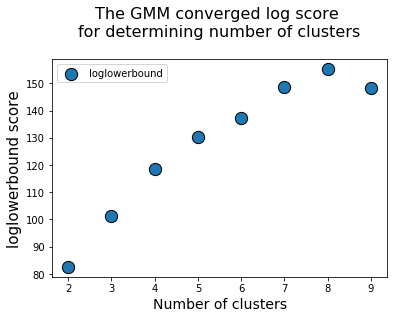

Component_ 2  Converged is =  True
Component_ 3  Converged is =  True
Component_ 4  Converged is =  True
Component_ 5  Converged is =  True
Component_ 6  Converged is =  True
Component_ 7  Converged is =  True
Component_ 8  Converged is =  True
Component_ 9  Converged is =  True


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
                means_init=None, n_components=8, n_init=1, precisions_init=None,
                random_state=10, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [5]:
#BIC Score for AdultHotEncoded Without Ground Truth
CalculateBICScore(X_HotEncoded,Y_HotEncoded)

Component_ 2  BIC Score is =  407269.971820401  and logscore =  376.091149414223  AIC score=  -1001362.5976568921  Silhoueete = 0.010664815514837311
Component_ 3  BIC Score is =  1126036.9276700087  and logscore =  435.35468174929025  AIC score=  -986914.726997161  Silhoueete = 0.008081339037511693
Component_ 4  BIC Score is =  1526968.9553027083  and logscore =  574.0769461385844  AIC score=  -1290301.7845543376  Silhoueete = 0.006963308641988301
Component_ 5  BIC Score is =  1278100.695073984  and logscore =  875.2492824932345  AIC score=  -2243489.129972938  Silhoueete = 0.005774226236360622
Component_ 6  BIC Score is =  1185559.9977723965  and logscore =  1137.3397281161006  AIC score=  -3040348.9124644026  Silhoueete = 0.005617938463878927
Component_ 7  BIC Score is =  1264976.5245358637  and logscore =  1356.440867722703  AIC score=  -3665251.4708908116  Silhoueete = 0.005214793799214173
Component_ 8  BIC Score is =  1493637.037304026  and logscore =  1538.2310108281313  AIC scor

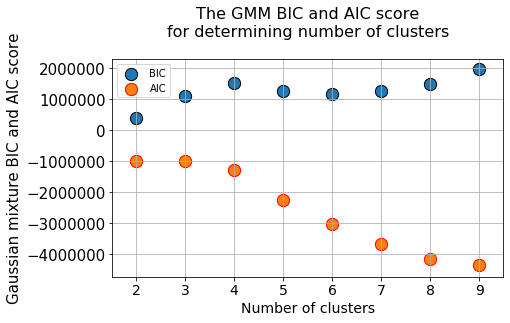

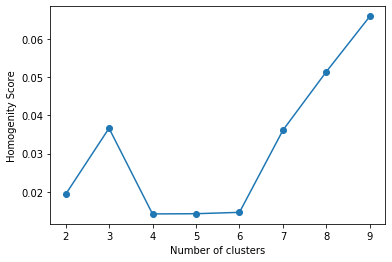

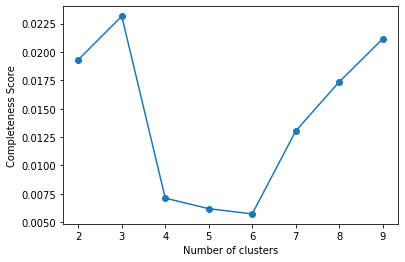

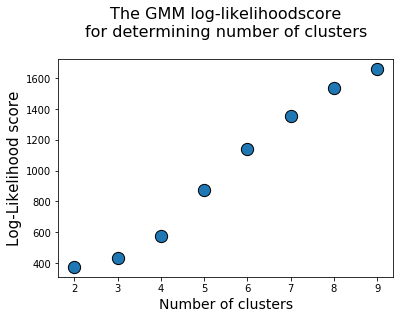

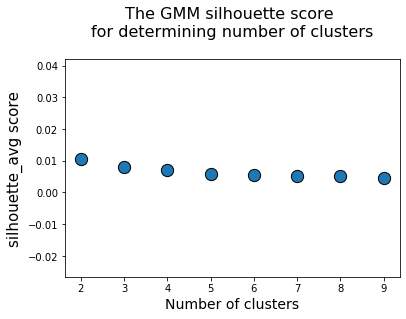

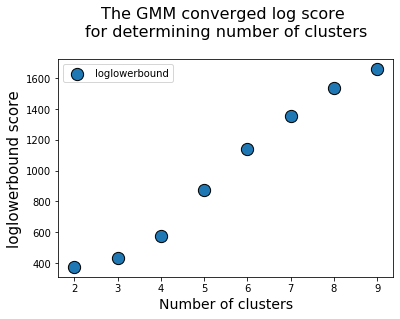

Component_ 2  Converged is =  True
Component_ 3  Converged is =  True
Component_ 4  Converged is =  True
Component_ 5  Converged is =  True
Component_ 6  Converged is =  True
Component_ 7  Converged is =  True
Component_ 8  Converged is =  True
Component_ 9  Converged is =  True


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=10, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [7]:
#BIC Score for scaled Madelon data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled=scaler.fit_transform(dfMadelon_X)
CalculateBICScore(X_scaled,dfMadelon_Y)

In [21]:
def Plot2MeansCluster(X,y_km,km):
    plt.scatter(
        X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )

    plt.scatter(
        X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )
    
    # plot the means
    plt.scatter(
        km.means_[:, 0], km.means_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='means'
    )
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
  
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

In [22]:
def Plot3MeansCluster(X,y_km,km):
    plt.scatter(
        X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )

    plt.scatter(
        X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )

    plt.scatter(
        X[y_km == 2, 0], X[y_km == 2, 1],
        s=50, c='lightblue',
        marker='v', edgecolor='black',
        label='cluster 3'
    )
      # plot the means
    plt.scatter(
        km.means_[:, 0], km.means_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='means'
    )
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

In [23]:
def Plot8MeansCluster(X,y_km,km):
    plt.scatter(
        X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )

    plt.scatter(
        X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )
    
    plt.scatter(
        X[y_km == 2, 0], X[y_km == 2, 1],
        s=50, c='lightblue',
        marker='o', edgecolor='black',
        label='cluster 3'
    )
    
    plt.scatter(
        X[y_km == 3, 0], X[y_km == 3, 1],
        s=50, c='brown',
        marker='o', edgecolor='black',
        label='cluster 4'
    )
    
    plt.scatter(
        X[y_km == 4, 0], X[y_km == 4, 1],
        s=50, c='pink',
        marker='o', edgecolor='black',
        label='cluster 5'
    )
    
    plt.scatter(
        X[y_km == 5, 0], X[y_km == 5, 1],
        s=50, c='black',
        marker='o', edgecolor='black',
        label='cluster 6'
    )

    plt.scatter(
        X[y_km == 6, 0], X[y_km == 6, 1],
        s=50, c='yellow',
        marker='v', edgecolor='black',
        label='cluster 7'
    )
    
    plt.scatter(
        X[y_km == 7, 0], X[y_km == 7, 1],
        s=50, c='green',
        marker='v', edgecolor='black',
        label='cluster 8'
    )
    
      # plot the means
    plt.scatter(
        km.means_[:, 0], km.means_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='means'
    )
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

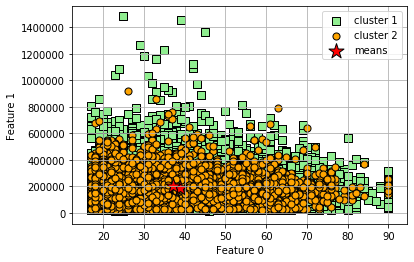

In [24]:
#Adult dataSet with one hot encoded with no ground truth n_components=2
gmm = GaussianMixture(n_components = 2,random_state=10)
y_km = gmm.fit_predict(X_HotEncoded)
#print(labels)

Plot2MeansCluster(X_HotEncoded.values[:,:],y_km,gmm)

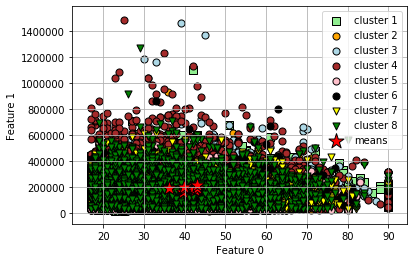

In [25]:
gmm = GaussianMixture(n_components = 8,random_state=10,max_iter=1000)
y_km = gmm.fit_predict(X_HotEncoded)
#print(labels)

Plot8MeansCluster(X_HotEncoded.values[:,:],y_km,gmm)


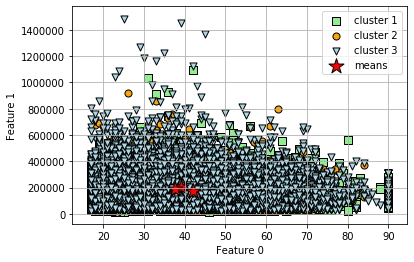

In [26]:
#Adult dataSet with one hot encoded with no ground truth n_components=3
gmm = GaussianMixture(n_components = 3,random_state=10)
y_km = gmm.fit_predict(X_HotEncoded)
#print(labels)

Plot3MeansCluster(X_HotEncoded.values[:,:],y_km,gmm)

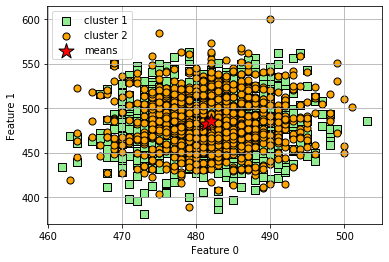

In [31]:
#Madelon dataset with no ground truth n_components=2
gmm = GaussianMixture(n_components = 2,random_state=10)
y_km = gmm.fit_predict(dfMadelon_X)
#print(labels)

Plot2MeansCluster(dfMadelon_X.values[:,:],y_km,gmm)

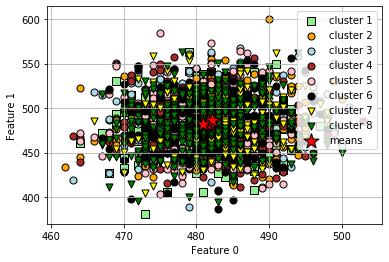

In [27]:
gmm = GaussianMixture(n_components = 8,random_state=10,max_iter=1000)
y_km = gmm.fit_predict(dfMadelon_X)
#print(labels)

Plot8MeansCluster(dfMadelon_X.values[:,:],y_km,gmm)

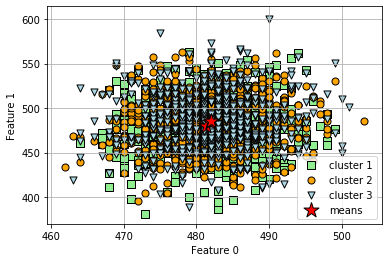

In [28]:
#Madelon dataset with no ground truth n_components=2
gmm = GaussianMixture(n_components = 3,random_state=10)
y_km = gmm.fit_predict(dfMadelon_X)
#print(labels)

Plot3MeansCluster(dfMadelon_X.values[:,:],y_km,gmm)

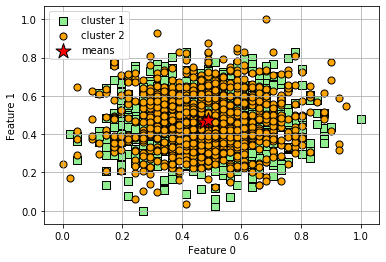

In [29]:
#Madelon dataset with no ground truth n_components=2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled=scaler.fit_transform(dfMadelon_X)

gmm = GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                 means_init=None, n_components=2, n_init=1, precisions_init=None,
                 random_state=10, reg_covar=1e-06, tol=0.001, verbose=0,
                 verbose_interval=10, warm_start=False, weights_init=None)
y_km = gmm.fit_predict(X_scaled)
#print(labels)

Plot2MeansCluster(X_scaled,y_km,gmm)

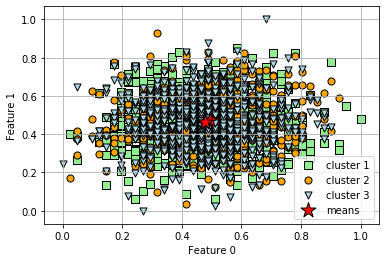

In [32]:
#Madelon dataset with no ground truth n_components=2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled=scaler.fit_transform(dfMadelon_X)

gmm = GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                 means_init=None, n_components=3, n_init=1, precisions_init=None,
                 random_state=10, reg_covar=1e-06, tol=0.001, verbose=0,
                 verbose_interval=10, warm_start=False, weights_init=None)
y_km = gmm.fit_predict(X_scaled)
#print(labels)

Plot3MeansCluster(X_scaled,y_km,gmm)

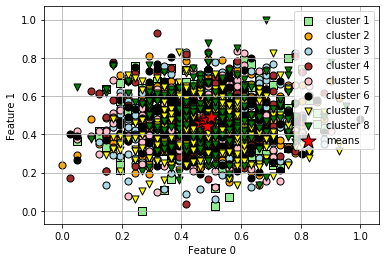

In [30]:
#Madelon dataset with no ground truth n_components=2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled=scaler.fit_transform(dfMadelon_X)

gmm = GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                 means_init=None, n_components=8, n_init=1, precisions_init=None,
                 random_state=10, reg_covar=1e-06, tol=0.001, verbose=0,
                 verbose_interval=10, warm_start=False, weights_init=None)
y_km = gmm.fit_predict(X_scaled)
#print(labels)

Plot8MeansCluster(X_scaled,y_km,gmm)